In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "/content/drive/MyDrive/Airbnb NYC 2019.xlsx"

In [4]:
# Load data
df = pd.read_excel(url)


In [5]:
# Preview
print(df.head())
print(df.info())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [6]:
# Drop irrelevant columns
df.drop(columns=['id', 'name', 'host_name', 'last_review'], inplace=True)

In [7]:
# Handle missing values
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


In [8]:
# Remove listings with zero or unrealistic price
df = df[df['price'] > 0]
df = df[df['price'] < 1000]

In [9]:
# Feature engineering
df['price_bucket'] = pd.cut(df['price'], bins=[0, 100, 200, 300, 1000], labels=['Low', 'Medium', 'High', 'Very High'])
df['availability_flag'] = df['availability_365'].apply(lambda x: 'High' if x > 200 else 'Low')

In [10]:
# Descriptive stats
print(df.describe())

            host_id      latitude     longitude         price  minimum_nights  \
count  4.858600e+04  48586.000000  48586.000000  48586.000000    48586.000000   
mean   6.763733e+07     40.728927    -73.952031    140.269049        6.974931   
std    7.860718e+07      0.054580      0.046156    112.899316       20.276877   
min    2.438000e+03     40.499790    -74.244420     10.000000        1.000000   
25%    7.831209e+06     40.690002    -73.982950     69.000000        1.000000   
50%    3.084879e+07     40.722960    -73.955580    105.000000        3.000000   
75%    1.074344e+08     40.763130    -73.936100    175.000000        5.000000   
max    2.743213e+08     40.913060    -73.712990    999.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48586.000000       48586.000000                    48586.000000   
mean           23.372803           1.095313                        7.168670   
std            44.651661         

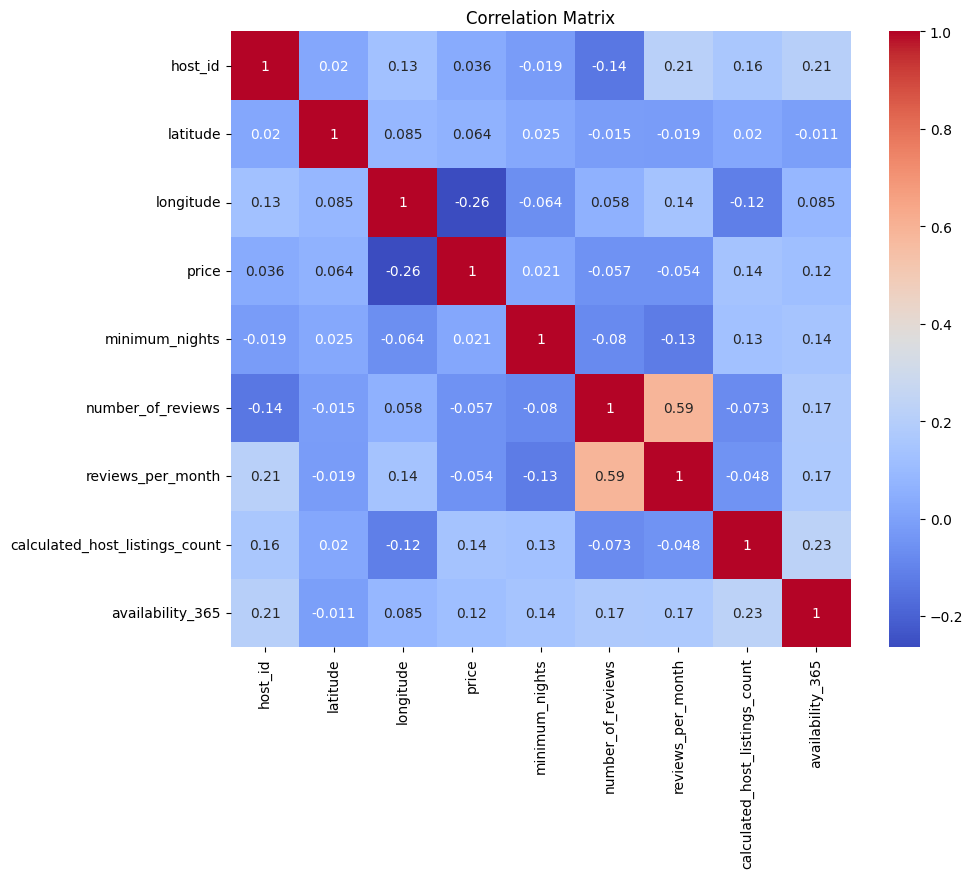

In [12]:
# Correlation analysis
numerical = df.select_dtypes(include=np.number)
cor_matrix = numerical.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

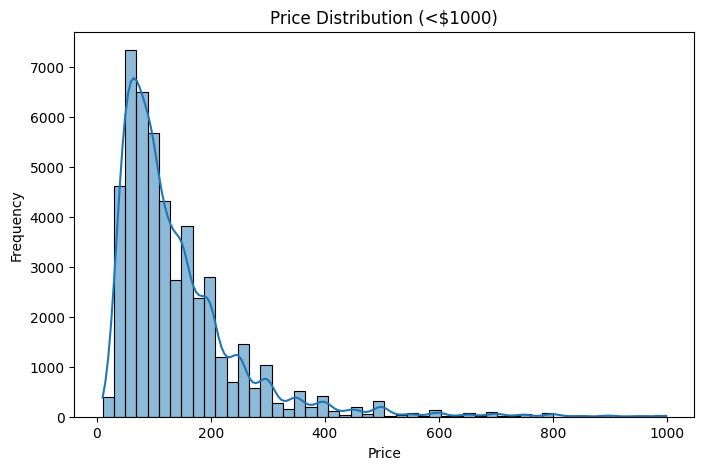

In [13]:
 #Price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution (<$1000)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

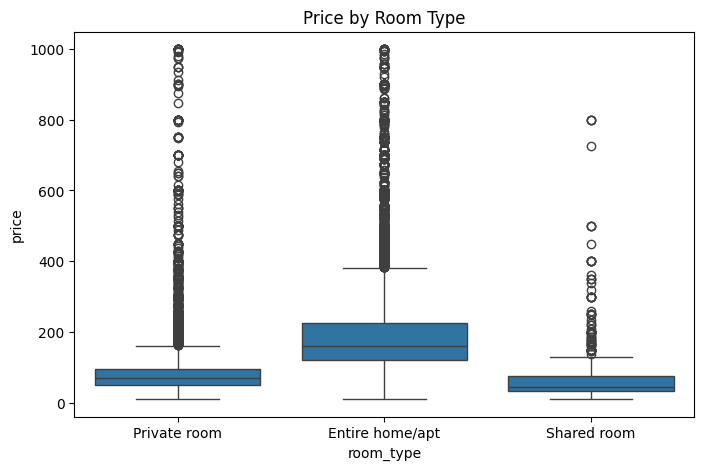

In [14]:
# Room type vs price
plt.figure(figsize=(8, 5))
sns.boxplot(x='room_type', y='price', data=df)
plt.title("Price by Room Type")
plt.show()

/tmp/ipython-input-15-1641416527.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='neighbourhood_group', data=df, palette='Set2')


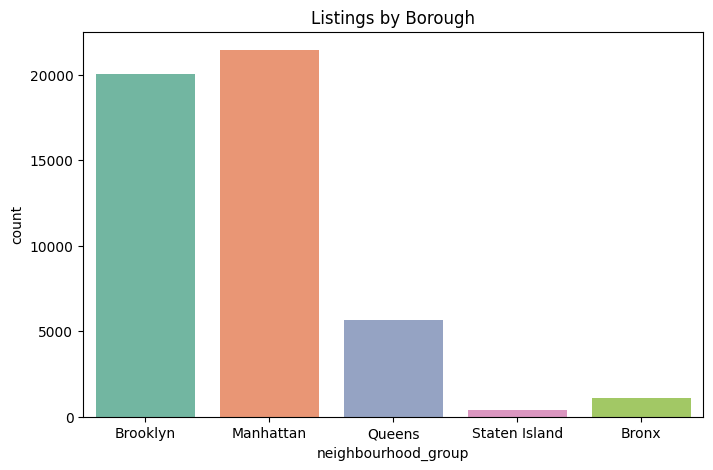

In [15]:
# Listings by neighbourhood group
plt.figure(figsize=(8, 5))
sns.countplot(x='neighbourhood_group', data=df, palette='Set2')
plt.title("Listings by Borough")
plt.show()

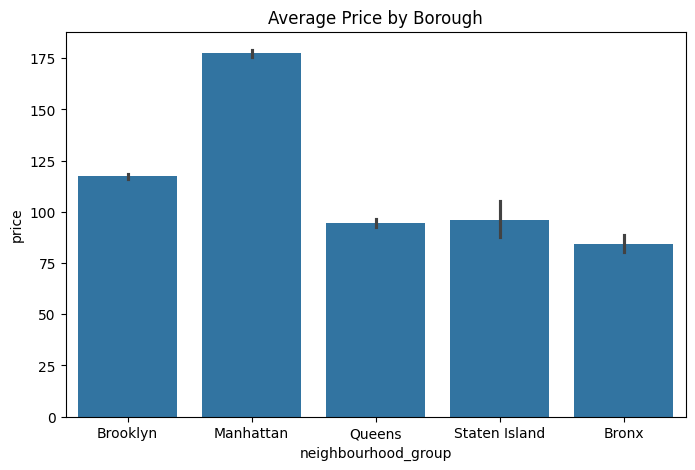

In [16]:
# Average price by borough
plt.figure(figsize=(8, 5))
sns.barplot(x='neighbourhood_group', y='price', data=df)
plt.title("Average Price by Borough")
plt.show()

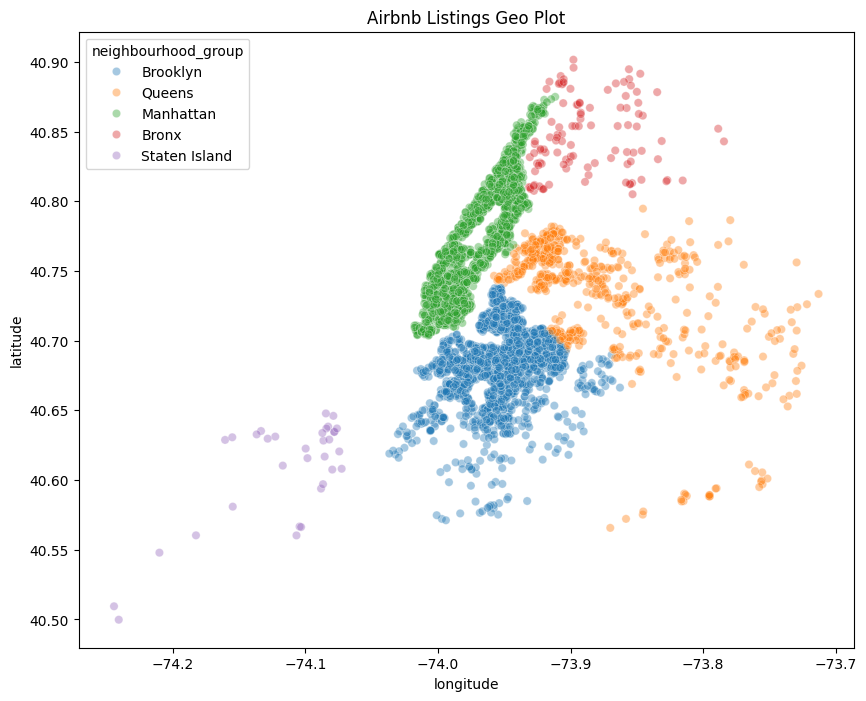

In [17]:
# Map view (requires geopandas for fancier mapping, optional)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df.sample(5000), alpha=0.4)
plt.title("Airbnb Listings Geo Plot")
plt.show()

In [18]:
df.to_csv("airbnb_nyc_cleaned.csv", index=False)